# Dataquest Guided Project
## Data Cleaning
 __Exploring Ebay Car Sales Data__

In this project we will work with dataset of used cars from __eBay Kleinanzeigen__, a classified section of the German eBay website.

The aim of this project is to clean the data and analyze the included used car listing


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
autos = pd.read_csv('autos.csv', encoding="Latin-1")

In [3]:
autos.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [4]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [5]:
#Lets rename the some column
autos.rename(columns={"yearOfRegistration": "registration_year", "monthOfRegistration":"registration_month", "notRepairDamage":"unrepaired_damage", "dateCreated":"ad_created","fuelType": "fuel_type","notRepairedDamage":"unrepaired_damage", "nrOfPictures": "numb_of_picture"}, inplace=True)

In [6]:
autos.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,registration_year,gearbox,powerPS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,numb_of_picture,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [7]:
autos.describe(include="all")

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,registration_year,gearbox,powerPS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,numb_of_picture,postalCode,lastSeen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-12 16:06:22,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


we can see above that the columnn numb_of picture, seller and offer type has only one value, and we can drop the column since we cannot extract any important information from it.
the column price and odometer should be numeric instead stored as text

In [8]:
#Let's remove non_numeric character in column price and convert it to numeric dtype
autos["price"]= (autos["price"]
      .str.replace("$", "")
      .str.replace(",", "").astype(float)
      )

In [9]:
autos["odometer"]= (autos["odometer"]
                   .str.replace("km", "")
                   .str.replace(",", "")
                   .astype(float)
                   )

In [10]:
#Let's rename column odometer to odometer_km
autos = autos.rename(columns ={"dateCrawled":"date_crawled", "odometer":"odometer_km", "lastSeen":"last_seen", "postalCode":"postal_code"})

In [11]:
autos.head(5)

,date_crawled,name,seller,offerType,price,abtest,vehicleType,registration_year,gearbox,powerPS,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,numb_of_picture,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000.0,control,bus,2004,manuell,158,andere,150000.0,3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500.0,control,limousine,1997,automatik,286,7er,150000.0,6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,8990.0,test,limousine,2009,manuell,102,golf,70000.0,7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350.0,control,kleinwagen,2007,automatik,71,fortwo,70000.0,6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350.0,test,kombi,2003,manuell,0,focus,150000.0,7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [12]:
autos["price"].unique().shape

(2357,)

In [13]:
autos["price"].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [14]:
autos["price"].value_counts().head(20)

0.0       1421
500.0      781
1500.0     734
2500.0     643
1200.0     639
1000.0     639
600.0      531
800.0      498
3500.0     498
2000.0     460
999.0      434
750.0      433
900.0      420
650.0      419
850.0      410
700.0      395
4500.0     394
300.0      384
2200.0     382
950.0      379
Name: price, dtype: int64

In [15]:
autos["price"].value_counts().sort_index(ascending=False).head(20)

99999999.0    1
27322222.0    1
12345678.0    3
11111111.0    2
10000000.0    1
3890000.0     1
1300000.0     1
1234566.0     1
999999.0      2
999990.0      1
350000.0      1
345000.0      1
299000.0      1
295000.0      1
265000.0      1
259000.0      1
250000.0      1
220000.0      1
198000.0      1
197000.0      1
Name: price, dtype: int64

In [16]:
autos["price"].value_counts().sort_index(ascending=True).head(20)

0.0     1421
1.0      156
2.0        3
3.0        1
5.0        2
8.0        1
9.0        1
10.0       7
11.0       2
12.0       3
13.0       2
14.0       1
15.0       2
17.0       3
18.0       1
20.0       4
25.0       5
29.0       1
30.0       7
35.0       1
Name: price, dtype: int64

For the data above, we can see that after 350,000 the price jump to 999,999. Let's have the price in the range 1-350,000, since we could not get any insight also from zero dollar.

In [17]:
autos = autos[autos["price"].between(1, 350000)]

Let's check the column "odometer_km"

In [18]:
autos["odometer_km"].unique().shape

(13,)

In [19]:
autos["odometer_km"].describe()

count     48565.000000
mean     125770.101925
std       39788.636804
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

In [20]:
autos["odometer_km"].value_counts().sort_index(ascending=False).head(20)

150000.0    31414
125000.0     5057
100000.0     2115
90000.0      1734
80000.0      1415
70000.0      1217
60000.0      1155
50000.0      1012
40000.0       815
30000.0       780
20000.0       762
10000.0       253
5000.0        836
Name: odometer_km, dtype: int64

We can see above there is nothing wrong with the column odometer_km, seems no outliers.

## Exploring Date

Let's see the column with date value: date_crawled, ad_created, and last_seen

In [21]:
autos[['date_crawled', 'ad_created','last_seen']][0:5]

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


In [22]:
autos["date_crawled"].str[:10].value_counts(normalize=True, dropna=False).sort_index()

2016-03-05    0.025327
2016-03-06    0.014043
2016-03-07    0.036014
2016-03-08    0.033296
2016-03-09    0.033090
2016-03-10    0.032184
2016-03-11    0.032575
2016-03-12    0.036920
2016-03-13    0.015670
2016-03-14    0.036549
2016-03-15    0.034284
2016-03-16    0.029610
2016-03-17    0.031628
2016-03-18    0.012911
2016-03-19    0.034778
2016-03-20    0.037887
2016-03-21    0.037373
2016-03-22    0.032987
2016-03-23    0.032225
2016-03-24    0.029342
2016-03-25    0.031607
2016-03-26    0.032204
2016-03-27    0.031092
2016-03-28    0.034860
2016-03-29    0.034099
2016-03-30    0.033687
2016-03-31    0.031834
2016-04-01    0.033687
2016-04-02    0.035478
2016-04-03    0.038608
2016-04-04    0.036487
2016-04-05    0.013096
2016-04-06    0.003171
2016-04-07    0.001400
Name: date_crawled, dtype: float64

In [23]:
autos["ad_created"].str[:10].value_counts(normalize=True, dropna=False).sort_index()

2015-06-11    0.000021
2015-08-10    0.000021
2015-09-09    0.000021
2015-11-10    0.000021
2015-12-05    0.000021
2015-12-30    0.000021
2016-01-03    0.000021
2016-01-07    0.000021
2016-01-10    0.000041
2016-01-13    0.000021
2016-01-14    0.000021
2016-01-16    0.000021
2016-01-22    0.000021
2016-01-27    0.000062
2016-01-29    0.000021
2016-02-01    0.000021
2016-02-02    0.000041
2016-02-05    0.000041
2016-02-07    0.000021
2016-02-08    0.000021
2016-02-09    0.000021
2016-02-11    0.000021
2016-02-12    0.000041
2016-02-14    0.000041
2016-02-16    0.000021
2016-02-17    0.000021
2016-02-18    0.000041
2016-02-19    0.000062
2016-02-20    0.000041
2016-02-21    0.000062
                ...   
2016-03-09    0.033151
2016-03-10    0.031895
2016-03-11    0.032904
2016-03-12    0.036755
2016-03-13    0.017008
2016-03-14    0.035190
2016-03-15    0.034016
2016-03-16    0.030125
2016-03-17    0.031278
2016-03-18    0.013590
2016-03-19    0.033687
2016-03-20    0.037949
2016-03-21 

In [24]:
autos["last_seen"].str[:10].value_counts(normalize=True, dropna=False).sort_index()

2016-03-05    0.001071
2016-03-06    0.004324
2016-03-07    0.005395
2016-03-08    0.007413
2016-03-09    0.009595
2016-03-10    0.010666
2016-03-11    0.012375
2016-03-12    0.023783
2016-03-13    0.008895
2016-03-14    0.012602
2016-03-15    0.015876
2016-03-16    0.016452
2016-03-17    0.028086
2016-03-18    0.007351
2016-03-19    0.015834
2016-03-20    0.020653
2016-03-21    0.020632
2016-03-22    0.021373
2016-03-23    0.018532
2016-03-24    0.019767
2016-03-25    0.019211
2016-03-26    0.016802
2016-03-27    0.015649
2016-03-28    0.020859
2016-03-29    0.022341
2016-03-30    0.024771
2016-03-31    0.023783
2016-04-01    0.022794
2016-04-02    0.024915
2016-04-03    0.025203
2016-04-04    0.024483
2016-04-05    0.124761
2016-04-06    0.221806
2016-04-07    0.131947
Name: last_seen, dtype: float64

## Exploring registration_year column
the registration_year column is from the website. let's check the column for any suspicious data


In [25]:
autos["registration_year"].describe()

count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

In [26]:
autos["registration_year"].value_counts().sort_index().head(20)

1000    1
1001    1
1111    1
1800    2
1910    5
1927    1
1929    1
1931    1
1934    2
1937    4
1938    1
1939    1
1941    2
1943    1
1948    1
1950    3
1951    2
1952    1
1953    1
1954    2
Name: registration_year, dtype: int64

In [27]:
autos["registration_year"].value_counts().sort_index(ascending=False).head(20)

9999       3
9000       1
8888       1
6200       1
5911       1
5000       4
4800       1
4500       1
4100       1
2800       1
2019       2
2018     470
2017    1392
2016    1220
2015     392
2014     663
2013     803
2012    1310
2011    1623
2010    1589
Name: registration_year, dtype: int64

the registration_year column has some data that seems not right, year 1000,1001,1111 and 1800 and from year 2800 onwards  looks like mistake. 

In [28]:
autos.loc[autos["registration_year"]==2019]

,date_crawled,name,seller,offerType,price,abtest,vehicleType,registration_year,gearbox,powerPS,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,numb_of_picture,postal_code,last_seen
5763,2016-03-05 19:54:49,Suche_Auspuff_Anlage_honda_crx_del_sol,privat,Angebot,100.0,test,NaN,2019,manuell,125,cr_reihe,20000.0,4,NaN,honda,nein,2016-03-05 00:00:00,0,18106,2016-03-06 04:45:59
49185,2016-03-28 11:45:31,Alfa_Romeo_156_Sportwagon_1_8_T_Spark,privat,Angebot,1200.0,control,NaN,2019,manuell,140,156,150000.0,5,benzin,alfa_romeo,nein,2016-03-28 00:00:00,0,91058,2016-04-06 13:45:56


Registration must be happen before ad listing. From the ad_created we can see that the latest year is 2016, hence any registration year beyond it, is unrealistic. Let's have the registration_year column on the range 1900-2016

In [29]:
autos= autos[autos["registration_year"].between(1900,2016)]

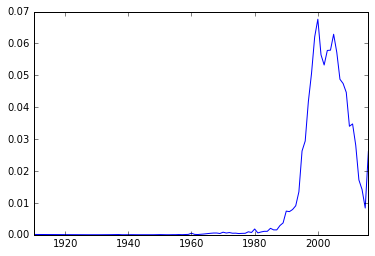

In [30]:
autos["registration_year"].value_counts(normalize=True).sort_index().plot()
plt.show()

Most of the cars have registered around year 1990 onward.

## Exploring the brand column

autos["brand"].value_counts(normalize=True)

In [31]:
autos.brand.nunique()

40

There are 40 brands in the dataset, the 6 top brands in the data set represent 68% of the listing,each brand has more than 5% of the total listing lead by volkswagen with more than 20% and also almost double from bmw as the second top brands.

In [32]:
brand_counts= autos.brand.value_counts(normalize=True)
top_brand= brand_counts[brand_counts > .05].index
print(top_brand)

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')


Brand volkswagen, bnw, opel,mercedez_benz, audi, and ford has more than 5% percentage of the total listing

In [33]:
brand_mean_price= {}

for b in top_brand:
    brand_group= autos[autos["brand"]==b]
    mean_price = brand_group["price"].mean()
    brand_mean_price[b]= int(mean_price)
print(brand_mean_price)

{'mercedes_benz': 8628, 'ford': 3749, 'audi': 9336, 'opel': 2975, 'volkswagen': 5402, 'bmw': 8332}


if we rank based on the price, audi is the expensive one, followed by mercedes_benz and bmw. opel and ford are the cheap one with the average price below 5000, meanwhile volkswagen is in the middle.

In [34]:
brand_milage = {}
for b in top_brand:
    brand_group = autos[autos["brand"]==b]
    mean_milage = brand_group["odometer_km"].mean()
    brand_milage[b]=int(mean_milage)
print(brand_milage)

{'mercedes_benz': 130788, 'ford': 124266, 'audi': 129157, 'opel': 129310, 'volkswagen': 128707, 'bmw': 132572}


In [35]:
brand_mean_price_series= pd.Series(brand_mean_price)
brand_mean_milage_series = pd.Series(brand_milage)
print(brand_mean_price_series)
print(brand_mean_milage_series)

audi             9336
bmw              8332
ford             3749
mercedes_benz    8628
opel             2975
volkswagen       5402
dtype: int64
audi             129157
bmw              132572
ford             124266
mercedes_benz    130788
opel             129310
volkswagen       128707
dtype: int64


In [36]:
brand_agg= pd.DataFrame(brand_mean_milage_series, columns=["brand_mean_milage_series"])
brand_agg

,brand_mean_milage_series
audi,129157
bmw,132572
ford,124266
mercedes_benz,130788
opel,129310
volkswagen,128707


In [37]:
brand_agg["brand_mean_price_series"]=brand_mean_price_series
brand_agg

,brand_mean_milage_series,brand_mean_price_series
audi,129157,9336
bmw,132572,8332
ford,124266,3749
mercedes_benz,130788,8628
opel,129310,2975
volkswagen,128707,5402


it seems no relation between price and milage if we compare between brand.

Let's explore our dataset further!

In [38]:
autos.head()

,date_crawled,name,seller,offerType,price,abtest,vehicleType,registration_year,gearbox,powerPS,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,numb_of_picture,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000.0,control,bus,2004,manuell,158,andere,150000.0,3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500.0,control,limousine,1997,automatik,286,7er,150000.0,6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,8990.0,test,limousine,2009,manuell,102,golf,70000.0,7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350.0,control,kleinwagen,2007,automatik,71,fortwo,70000.0,6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350.0,test,kombi,2003,manuell,0,focus,150000.0,7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


it looks some column use german word.The column with german word are:

* vehicleType
* gearbox
* unrepaired_damage
* fuel_type

Let's explore each column

In [40]:
autos["vehicleType"].unique()

array(['bus', 'limousine', 'kleinwagen', 'kombi', nan, 'coupe', 'suv',
       'cabrio', 'andere'], dtype=object)

In [41]:
autos["gearbox"].unique()

array(['manuell', 'automatik', nan], dtype=object)

In [42]:
autos["unrepaired_damage"].unique()

array(['nein', nan, 'ja'], dtype=object)

In [43]:
autos["fuel_type"].unique()

array(['lpg', 'benzin', 'diesel', nan, 'cng', 'hybrid', 'elektro',
       'andere'], dtype=object)

Let's translate the german words in those column to english.

In [44]:
german_translated = {
    "bus":"bus",
    "limousine": "limousine",
    "kleinwagen": "small_car",
    "kombi": "station_wagon",
    "coupe": "coupe",
    "cabrio":"cabrio",
     "andere": "other",
     "manuell": "manual",
      "automatik": "automatic",
     "lpg": "lpg",
      "benzin": "petrol",
       "diesel": "diesel",
       "cng":"cng",
     "hybrid": "hybrid",
      "elektro": "elektro",
      "nein": "no",
      "ja": "yes"
      }
for each in ["vehicleType", "gearbox", "unrepaired_damage","fuel_type"]:
    autos[each]=autos[each].map(german_translated)

Let's check the result

In [45]:
autos["vehicleType"].unique()

array(['bus', 'limousine', 'small_car', 'station_wagon', nan, 'coupe',
       'cabrio', 'other'], dtype=object)

In [47]:
autos["gearbox"].unique()

array(['manual', 'automatic', nan], dtype=object)

In [48]:
autos["unrepaired_damage"].unique()

array(['no', nan, 'yes'], dtype=object)

In [49]:
autos["fuel_type"].unique()

array(['lpg', 'petrol', 'diesel', nan, 'cng', 'hybrid', 'elektro',
       'other'], dtype=object)

Convert the dates to uniform numeric data, so "2016-03-21" becomes the integer 20160321.
Let's check the column that contains dates

In [50]:
autos.head()

,date_crawled,name,seller,offerType,price,abtest,vehicleType,registration_year,gearbox,powerPS,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,numb_of_picture,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000.0,control,bus,2004,manual,158,andere,150000.0,3,lpg,peugeot,no,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500.0,control,limousine,1997,automatic,286,7er,150000.0,6,petrol,bmw,no,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,8990.0,test,limousine,2009,manual,102,golf,70000.0,7,petrol,volkswagen,no,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350.0,control,small_car,2007,automatic,71,fortwo,70000.0,6,petrol,smart,no,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350.0,test,station_wagon,2003,manual,0,focus,150000.0,7,petrol,ford,no,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


There are 3 columns that contain dates; "date_crawled, "ad_created", "last_seen"

In [53]:
date_cols = ["date_crawled", "ad_created", "last_seen"]

for each in date_cols:
    autos[each]= (autos[each]
                  .str[:10]
                 .str.replace('-', '')
                 .astype(int)
                 )

In [55]:
autos.head()

,date_crawled,name,seller,offerType,price,abtest,vehicleType,registration_year,gearbox,powerPS,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,numb_of_picture,postal_code,last_seen
0,20160326,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000.0,control,bus,2004,manual,158,andere,150000.0,3,lpg,peugeot,no,20160326,0,79588,20160406
1,20160404,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500.0,control,limousine,1997,automatic,286,7er,150000.0,6,petrol,bmw,no,20160404,0,71034,20160406
2,20160326,Volkswagen_Golf_1.6_United,privat,Angebot,8990.0,test,limousine,2009,manual,102,golf,70000.0,7,petrol,volkswagen,no,20160326,0,35394,20160406
3,20160312,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350.0,control,small_car,2007,automatic,71,fortwo,70000.0,6,petrol,smart,no,20160312,0,33729,20160315
4,20160401,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350.0,test,station_wagon,2003,manual,0,focus,150000.0,7,petrol,ford,no,20160401,0,39218,20160401


In [56]:
autos["brand"].value_counts()

volkswagen        9862
bmw               5137
opel              5022
mercedes_benz     4503
audi              4041
ford              3263
renault           2201
peugeot           1393
fiat              1197
seat               853
skoda              766
nissan             713
mazda              709
smart              661
citroen            654
toyota             593
hyundai            468
sonstige_autos     458
volvo              427
mini               409
mitsubishi         384
honda              366
kia                330
alfa_romeo         310
porsche            286
suzuki             277
chevrolet          266
chrysler           164
dacia              123
daihatsu           117
jeep               106
subaru             100
land_rover          98
saab                77
jaguar              73
daewoo              70
trabant             65
rover               62
lancia              50
lada                27
Name: brand, dtype: int64

In [58]:
brand_counts= autos["brand"].value_counts(normalize=True)

In [59]:
common_brands = brand_counts[brand_counts > .05].index
print(common_brands)

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')


Let's compare the price of cars with damage and non_damaged cars

In [90]:
damage_price = autos["price"][autos["unrepaired_damage"]=="yes"]
sorted(damage_price)

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 5.0,
 13.0,
 45.0,
 47.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 60.0,
 60.0,
 66.0,
 70.0,
 75.0,
 80.0,
 80.0,
 80.0,
 80.0,
 80.0,
 80.0,
 80.0,
 80.0,
 80.0,
 90.0,
 90.0,
 90.0,
 99.0,
 99.0,
 99.0,
 99.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 110.0,
 110.0,
 120.0,
 120.0,
 120.0,
 120.0,
 120.0,
 120.0,
 120.0,
 120.0,
 120.0,
 120.0,
 120.0,
 120.0,
 120.0,
 125.0,
 125.0,
 125.0,
 125.0,
 129.0,
 130.0,
 130.0,
 140.0,
 149.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0

In [89]:
no_damage_price= autos["price"][autos["unrepaired_damage"]=="no"]
sorted(no_damage_price)

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 10.0,
 11.0,
 14.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 60.0,
 65.0,
 70.0,
 70.0,
 75.0,
 75.0,
 79.0,
 90.0,
 90.0,
 99.0,
 99.0,
 99.0,
 99.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 117.0,
 120.0,
 130.0,
 139.0,
 140.0,
 145.0,
 145.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 156.0,
 15

In [91]:
damage_price.mean()

2241.146035242291

In [92]:
no_damage_price.mean()

7164.033102796004

we can see that the average price for damage cars is lower compare to non-damaged cars. But if we see from the lowest price, both categories has price 1 as the lowest.